<a href="https://colab.research.google.com/github/BitUpTeam/BitUp/blob/Amasya/Copy_of_Copy_of_BitUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Building LSTM Model

In [ ]:
df = pd.read_csv("https://github.com/BitUpTeam/BitUp/blob/main/BTC-USD-DAY-17.09.2014-06.03.2023.csv?raw=true", index_col = 'Date', parse_dates = True)
df    

array([[4.28907290e-03, 3.73944128e-03, 4.24270741e-03, 4.14358659e-03,
        4.14358659e-03, 4.31449241e-05],
       [4.15542811e-03, 3.57446063e-03, 3.64887469e-03, 3.65546320e-03,
        3.65546320e-03, 8.14009147e-05],
       [3.66922344e-03, 3.15121937e-03, 3.21734240e-03, 3.21556748e-03,
        3.21556748e-03, 9.11925723e-05],
       ...,
       [3.29302248e-01, 3.23623918e-01, 3.32688214e-01, 3.29064641e-01,
        3.29064641e-01, 3.17985921e-02],
       [3.29171939e-01, 3.26664370e-01, 3.34321823e-01, 3.30283896e-01,
        3.30283896e-01, 3.79274284e-02],
       [3.30409195e-01, 3.26211646e-01, 3.34783595e-01, 3.30336587e-01,
        3.30336587e-01, 4.97450703e-02]])

In [ ]:
# del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,6))
print(df1.shape)

(3093, 6)


In [ ]:
df1

array([[4.28907290e-03, 3.73944128e-03, 4.24270741e-03, 4.14358659e-03,
        4.14358659e-03, 4.31449241e-05],
       [4.15542811e-03, 3.57446063e-03, 3.64887469e-03, 3.65546320e-03,
        3.65546320e-03, 8.14009147e-05],
       [3.66922344e-03, 3.15121937e-03, 3.21734240e-03, 3.21556748e-03,
        3.21556748e-03, 9.11925723e-05],
       ...,
       [3.29302248e-01, 3.23623918e-01, 3.32688214e-01, 3.29064641e-01,
        3.29064641e-01, 3.17985921e-02],
       [3.29171939e-01, 3.26664370e-01, 3.34321823e-01, 3.30283896e-01,
        3.30283896e-01, 3.79274284e-02],
       [3.30409195e-01, 3.26211646e-01, 3.34783595e-01, 3.30336587e-01,
        3.30336587e-01, 4.97450703e-02]])

In [ ]:
df1.shape

(3093, 6)

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:6]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2165, 6)
test_data:  (928, 6)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, :])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2149, 15, 6)
y_train:  (2149, 6)
X_test:  (912, 15, 6)
y_test (912, 6)


In [ ]:
# измените входные данные так, чтобы они были [данные, временной шаг, особенность], которые требуются для LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 6)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 6)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print(X_train)

X_train:  (2149, 15, 6)
X_test:  (912, 15, 6)
[[[4.28907290e-03 3.73944128e-03 4.24270741e-03 4.14358659e-03
   4.14358659e-03 4.31449241e-05]
  [4.15542811e-03 3.57446063e-03 3.64887469e-03 3.65546320e-03
   3.65546320e-03 8.14009147e-05]
  [3.66922344e-03 3.15121937e-03 3.21734240e-03 3.21556748e-03
   3.21556748e-03 9.11925723e-05]
  ...
  [2.96901561e-03 2.52967809e-03 3.03169189e-03 2.92873938e-03
   2.92873938e-03 7.57436075e-05]
  [2.95654774e-03 2.61375753e-03 3.04986124e-03 3.09904962e-03
   3.09904962e-03 8.20394453e-05]
  [3.12484982e-03 2.61961960e-03 3.16067449e-03 3.04964952e-03
   3.04964952e-03 5.78832707e-05]]

 [[4.15542811e-03 3.57446063e-03 3.64887469e-03 3.65546320e-03
   3.65546320e-03 8.14009147e-05]
  [3.66922344e-03 3.15121937e-03 3.21734240e-03 3.21556748e-03
   3.21556748e-03 9.11925723e-05]
  [3.23240062e-03 3.08503185e-03 3.29816008e-03 3.42492004e-03
   3.42492004e-03 8.81834148e-05]
  ...
  [2.95654774e-03 2.61375753e-03 3.04986124e-03 3.09904962e-03
   3

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,6),activation="relu"))

model.add(Dense(6))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
68/68 [==============================] - 3s 13ms/step - loss: 0.0028 - val_loss: 0.2552
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 6.1171e-04 - val_loss: 20.2711
Epoch 3/100
68/68 [==============================] - 1s 8ms/step - loss: 2.1011e-04 - val_loss: 4.5225
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 1.6623e-04 - val_loss: 1.4652
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 1.4327e-04 - val_loss: 0.4317
Epoch 6/100
68/68 [==============================] - 1s 14ms/step - loss: 1.2691e-04 - val_loss: 0.2406
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 1.1584e-04 - val_loss: 0.1246
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0230e-04 - val_loss: 0.0766
Epoch 9/100
68/68 [==============================] - 1s 9ms/step - loss: 9.0280e-05 - val_loss: 0.0598
Epoch 10/100
68/68 [==============================] - 1s 10ms/step - lo

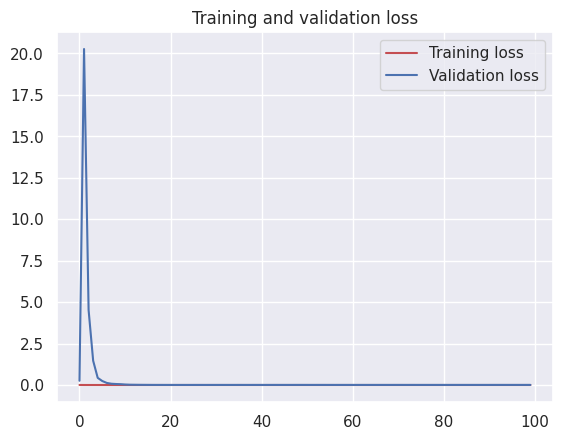

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

29/29 [==============================] - 0s 3ms/step


((2149, 6), (912, 6))

# Оценка модели

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,6)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,6)) 

In [ ]:
pd.DataFrame(test_predict, columns=df.columns, index=df.index[training_size+16:len(df1)])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-06,10608.793945,10777.943359,9995.237305,10226.587891,10406.135742,2.863345e+10
2020-09-07,10423.482422,10544.834961,9701.482422,9859.039062,10111.073242,3.516377e+10
2020-09-08,10231.861328,10383.262695,9671.049805,9858.078125,10033.304688,3.532256e+10
2020-09-09,10223.877930,10384.535156,9789.058594,9895.951172,10043.806641,3.413843e+10
2020-09-10,10161.802734,10323.978516,9760.556641,9817.319336,9969.495117,3.362816e+10
...,...,...,...,...,...,...
2023-03-02,22897.523438,23552.574219,21015.167969,22213.041016,22266.537109,2.157188e+10
2023-03-03,23194.582031,23880.351562,21333.830078,22499.792969,22517.687500,2.312573e+10
2023-03-04,23130.531250,23813.771484,21237.234375,22458.375000,22472.203125,2.207593e+10


In [ ]:
df[training_size+16:len(df1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-06,10167.216797,10353.927734,10056.885742,10280.351563,10280.351563,37071460174
2020-09-07,10280.998047,10399.153320,9916.493164,10369.563477,10369.563477,33703098409
2020-09-08,10369.306641,10414.775391,9945.110352,10131.516602,10131.516602,33430927462
2020-09-09,10134.151367,10350.542969,10017.250977,10242.347656,10242.347656,24128292755
2020-09-10,10242.330078,10503.912109,10238.135742,10363.138672,10363.138672,54406443211
...,...,...,...,...,...,...
2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913


In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1062585286.9704316
Train data MSE:  1.1290874920860344e+18
Train data MAE:  202973482.25332832
-------------------------------------------------------------------------------------
Test data RMSE:  8644200766.170734
Test data MSE:  7.472220688586672e+19
Test data MAE:  2356577242.71818


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain[:,1], train_predict[:,1]))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest[:,1], test_predict[:,1]))

Train data explained variance regression score: 0.9964729011483949
Test data explained variance regression score: 0.9719307193565985


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain[:,1], train_predict[:,1]))
print("Test data MGD: ", mean_gamma_deviance(original_ytest[:,1], test_predict[:,1]))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain[:,1], train_predict[:,1]))
print("Test data MPD: ", mean_poisson_deviance(original_ytest[:,1], test_predict[:,1]))

Train data MGD:  0.009224431679087864
Test data MGD:  0.004757876973041412
----------------------------------------------------------------------
Train data MPD:  9.884278423495031
Test data MPD:  223.40777140035445


In [ ]:
train_predict[:,1]

array([  441.73807,   438.00433,   428.83514, ..., 12173.199  ,
       12492.307  , 12461.574  ], dtype=float32)

# Остальное пока не работает

## **Сравнение первоначальной цены закрытия акций и прогнозируемой цены закрытия**

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
model.save('bitcoin/my_model')

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': df1.index,
                       'original_close': df1['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3093, 6)
Test predicted data:  (3093, 6)


ValueError: ignored

## Предсказание на след 30 дней (пока не работает)

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2016-02-01')]
closedf2016 = y_2016[['Date','Close']]
closedf2016

,Date,Close
471,2016-01-01,434.334015
472,2016-01-02,433.437988
473,2016-01-03,430.010986
474,2016-01-04,433.091003
475,2016-01-05,431.959991
476,2016-01-06,429.105011
477,2016-01-07,458.048004
478,2016-01-08,453.230011
479,2016-01-09,447.610992
480,2016-01-10,447.990997


In [ ]:
fig = px.line(closedf2016, x=closedf2016.Date, y=closedf2016.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()